In [1]:
library(lme4) # necessary for model fitting: glm
library(effects) # necessary for making effect plots
library(blmeco)

Loading required package: Matrix
Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.
Loading required package: MASS


# Statistics based on sender-addressee pairs

The frequencies in the columns (e.g. "hit_freq") represent the number of divine appeals per 100,000 words of total words per sender-addressee pair. Sender-addressee pairs are included if they have at least 5 letters in the dataset.

In [3]:
jeake_pair <- read.delim(file = "stats_jeake_pairs.tsv", sep = "\t", header = T)

In [4]:
head(jeake_pair)

str(jeake_pair)

id,hit_freq,conf_freq,appr_freq,fixed_freq,object_freq,grat_freq,pray_freq,preserve_freq,presupp_freq,...,health_freq,politics_freq,social_freq,pair,sender_over_40,addressee_over_40,sender_is_older,age_gap_over_20,gender_pair,connection
53,129.25,0,0,0,0,43.08,43.08,0,43.08,...,0,0,0.00,"CHRISTOPHER BLACKWOOD JR, SAMUEL JEAKE JR",FALSE,FALSE,TRUE,FALSE,MALE-MALE,FAMILY
54,0.00,0,0,0,0,0.00,0.00,0,0.00,...,0,0,0.00,"CHRISTOPHER BLACKWOOD JR, SAMUEL JEAKE JR",FALSE,FALSE,TRUE,FALSE,MALE-MALE,FAMILY
67,0.00,0,0,0,0,0.00,0.00,0,0.00,...,0,0,0.00,"CHRISTOPHER BLACKWOOD JR, SAMUEL JEAKE JR",FALSE,FALSE,TRUE,FALSE,MALE-MALE,FAMILY
71,0.00,0,0,0,0,0.00,0.00,0,0.00,...,0,0,0.00,"CHRISTOPHER BLACKWOOD JR, SAMUEL JEAKE JR",FALSE,FALSE,TRUE,FALSE,MALE-MALE,FAMILY
106,0.00,0,0,0,0,0.00,0.00,0,0.00,...,0,0,0.00,"CHRISTOPHER BLACKWOOD JR, SAMUEL JEAKE JR",FALSE,FALSE,TRUE,FALSE,MALE-MALE,FAMILY
56,147.78,0,0,0,0,0.00,0.00,0,0.00,...,0,0,98.52,"ELIZABETH DIGHTON, SAMUEL JEAKE JR",TRUE,FALSE,TRUE,TRUE,FEMALE-MALE,EXTENDED FAMILY


'data.frame':	205 obs. of  23 variables:
 $ id               : int  53 54 67 71 106 56 61 64 74 100 ...
 $ hit_freq         : num  129 0 0 0 0 ...
 $ conf_freq        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ appr_freq        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ fixed_freq       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ object_freq      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ grat_freq        : num  43.1 0 0 0 0 ...
 $ pray_freq        : num  43.1 0 0 0 0 ...
 $ preserve_freq    : num  0 0 0 0 0 ...
 $ presupp_freq     : num  43.1 0 0 0 0 ...
 $ resignate_freq   : num  0 0 0 0 0 ...
 $ trave_freq       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ trade_freq       : num  86.2 0 0 0 0 ...
 $ health_freq      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ politics_freq    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ social_freq      : num  0 0 0 0 0 ...
 $ pair             : Factor w/ 14 levels "CHRISTOPHER BLACKWOOD JR, SAMUEL JEAKE JR",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ sender_over_40   : Factor w/ 3 levels "FALSE","TRUE",..: 1 1 1 1 1 2 2 2 2 2 ...

The "id" column should be cast as a factor. The "addressee_over_40" column should be cast as a factor.

In [95]:
jeake_pair$id <- as.factor(jeake_pair$id)
str(jeake_pair$id)

jeake_pair$addressee_over_40 <- as.factor(jeake_pair$addressee_over_40)
str(jeake_pair$addressee)

 Factor w/ 205 levels "5","7","8","11",..: 33 34 40 42 57 35 36 38 44 53 ...
 Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
# test for data independence

length(jeake_pair$id)
length(unique(jeake_pair$id))

length(jeake_pair$id) == length(unique(jeake_pair$id))

[1] 205

[1] 205

[1] TRUE

In [74]:
# test for normality

shapiro.test(jeake_pair$hit_freq)


	Shapiro-Wilk normality test

data:  jeake_pair$hit_freq
W = 0.41772, p-value < 2.2e-16


In [96]:
# prepare data for different variables

# remove "UNK" and "MULT" values from sender_is_older column
j_pair_old <- jeake_pair[!(jeake_pair$sender_is_older %in% c("MULT", "UNK")),  ]
j_pair_old$sender_is_older <- droplevels(j_pair_old$sender_is_older)

"sender_is_older:"
levels(j_pair_old$sender_is_older)
nrow(j_pair_old)

# remove "UNK" and "MULT" values from sender_over_40 column
j_pair_se40 <- jeake_pair[!(jeake_pair$sender_over_40 %in% c("MULT", "UNK")),  ]
j_pair_se40$sender_over_40 <- droplevels(j_pair_se40$sender_over_40)

"sender_over_40:"
levels(j_pair_se40$sender_over_40)
nrow(j_pair_se40)

# remove "UNK" and "MULT" values from age_gap_over_20 column
j_pair_gap <- jeake_pair[!(jeake_pair$age_gap_over_20 %in% c("MULT", "UNK")),  ]
j_pair_gap$age_gap_over_20 <- droplevels(j_pair_gap$age_gap_over_20)

"age_gap_over_20:"
levels(j_pair_gap$age_gap_over_20)
nrow(j_pair_gap)

[1] "sender_is_older:"

[1] "FALSE" "TRUE"

[1] 167

[1] "sender_over_40:"

[1] "FALSE" "TRUE"

[1] 175

[1] "age_gap_over_20:"

[1] "FALSE" "TRUE"

[1] 166

### 1 Generalised linear model using "pair" as a predictor

In [97]:
j_pair1 <- glm(hit_freq ~ pair,
               data=jeake_pair,
               family=quasipoisson)

summary(j_pair1)
summary(j_pair1)$coef

"------------------------------drop1------------------------------"
drop1(j_pair1, test = "LR")

"------------------------------anova------------------------------"
simpler_j_pair1 <- glm(hit_freq ~ 1, data=jeake_pair, family=quasipoisson)
anova(simpler_j_pair1, j_pair1, test = "LR")

effect("pair", j_pair1)


Call:
glm(formula = hit_freq ~ pair, family = quasipoisson, data = jeake_pair)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-14.6104   -4.0133   -2.9024    0.8519   17.9089  

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                   3.25231    0.48650   6.685
pairELIZABETH DIGHTON, SAMUEL JEAKE JR        1.41801    0.53334   2.659
pairELIZABETH JEAKE, BARBARA HARTSHORNE      -1.78998    0.76882  -2.328
pairELIZABETH JEAKE, BARBARA JEAKE            0.87181    0.56495   1.543
pairELIZABETH JEAKE, SAMUEL JEAKE JR         -0.50261    0.79242  -0.634
pairFRANCIS JEAKE, JOSEPH TUCKER             -0.04740    0.66596  -0.071
pairJAMES WIGHTMAN, SAMUEL JEAKE JR          -1.12467    0.73509  -1.530
pairJOHN JAYE, SAMUEL JEAKE JR                0.07584    0.64770   0.117
pairJOHN MACKLEY, SAMUEL JEAKE JR            -1.80259    0.76059  -2.370
pairSAMUEL JEAKE JR, ELIZABETH JEAKE         -2.693

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.25231060,0.4865034,6.68507221,2.470882e-10
"pairELIZABETH DIGHTON, SAMUEL JEAKE JR",1.41800730,0.5333441,2.65871023,8.509482e-03
"pairELIZABETH JEAKE, BARBARA HARTSHORNE",-1.78998155,0.7688195,-2.32822095,2.094723e-02
"pairELIZABETH JEAKE, BARBARA JEAKE",0.87180849,0.5649508,1.54315813,1.244476e-01
"pairELIZABETH JEAKE, SAMUEL JEAKE JR",-0.50260675,0.7924221,-0.63426648,5.266659e-01
"pairFRANCIS JEAKE, JOSEPH TUCKER",-0.04739848,0.6659561,-0.07117359,9.433341e-01
"pairJAMES WIGHTMAN, SAMUEL JEAKE JR",-1.12467431,0.7350882,-1.52998563,1.276748e-01
"pairJOHN JAYE, SAMUEL JEAKE JR",0.07583808,0.6477024,0.11708783,9.069135e-01
"pairJOHN MACKLEY, SAMUEL JEAKE JR",-1.80259441,0.7605862,-2.37000683,1.878428e-02
"pairSAMUEL JEAKE JR, ELIZABETH JEAKE",-2.69396546,0.8502260,-3.16852883,1.784330e-03


[1] "------------------------------drop1------------------------------"

,Df,Deviance,scaled dev.,Pr(>Chi)
<none>,NA,5122.129,NA,NA
pair,13,8725.922,117.8033,5.465029e-19


[1] "------------------------------anova------------------------------"

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
204,8725.922,NA,NA,NA
191,5122.129,13,3603.793,5.465029e-19



 pair effect
pair
CHRISTOPHER BLACKWOOD JR, SAMUEL JEAKE JR 
                                25.850000 
       ELIZABETH DIGHTON, SAMUEL JEAKE JR 
                               106.731667 
      ELIZABETH JEAKE, BARBARA HARTSHORNE 
                                 4.316000 
           ELIZABETH JEAKE, BARBARA JEAKE 
                                61.813333 
         ELIZABETH JEAKE, SAMUEL JEAKE JR 
                                15.638000 
             FRANCIS JEAKE, JOSEPH TUCKER 
                                24.653333 
          JAMES WIGHTMAN, SAMUEL JEAKE JR 
                                 8.395000 
               JOHN JAYE, SAMUEL JEAKE JR 
                                27.886667 
            JOHN MACKLEY, SAMUEL JEAKE JR 
                                 4.261905 
         SAMUEL JEAKE JR, ELIZABETH JEAKE 
                                 1.747778 
         SAMUEL JEAKE JR, SAMUEL JEAKE SR 
                                27.558571 
 SAMUEL JEAKE SR, FRANCES JEAKE-HAR

The results of the simpler model suggest that dropping the terms associated to the "pair" variable do not worsen the model.

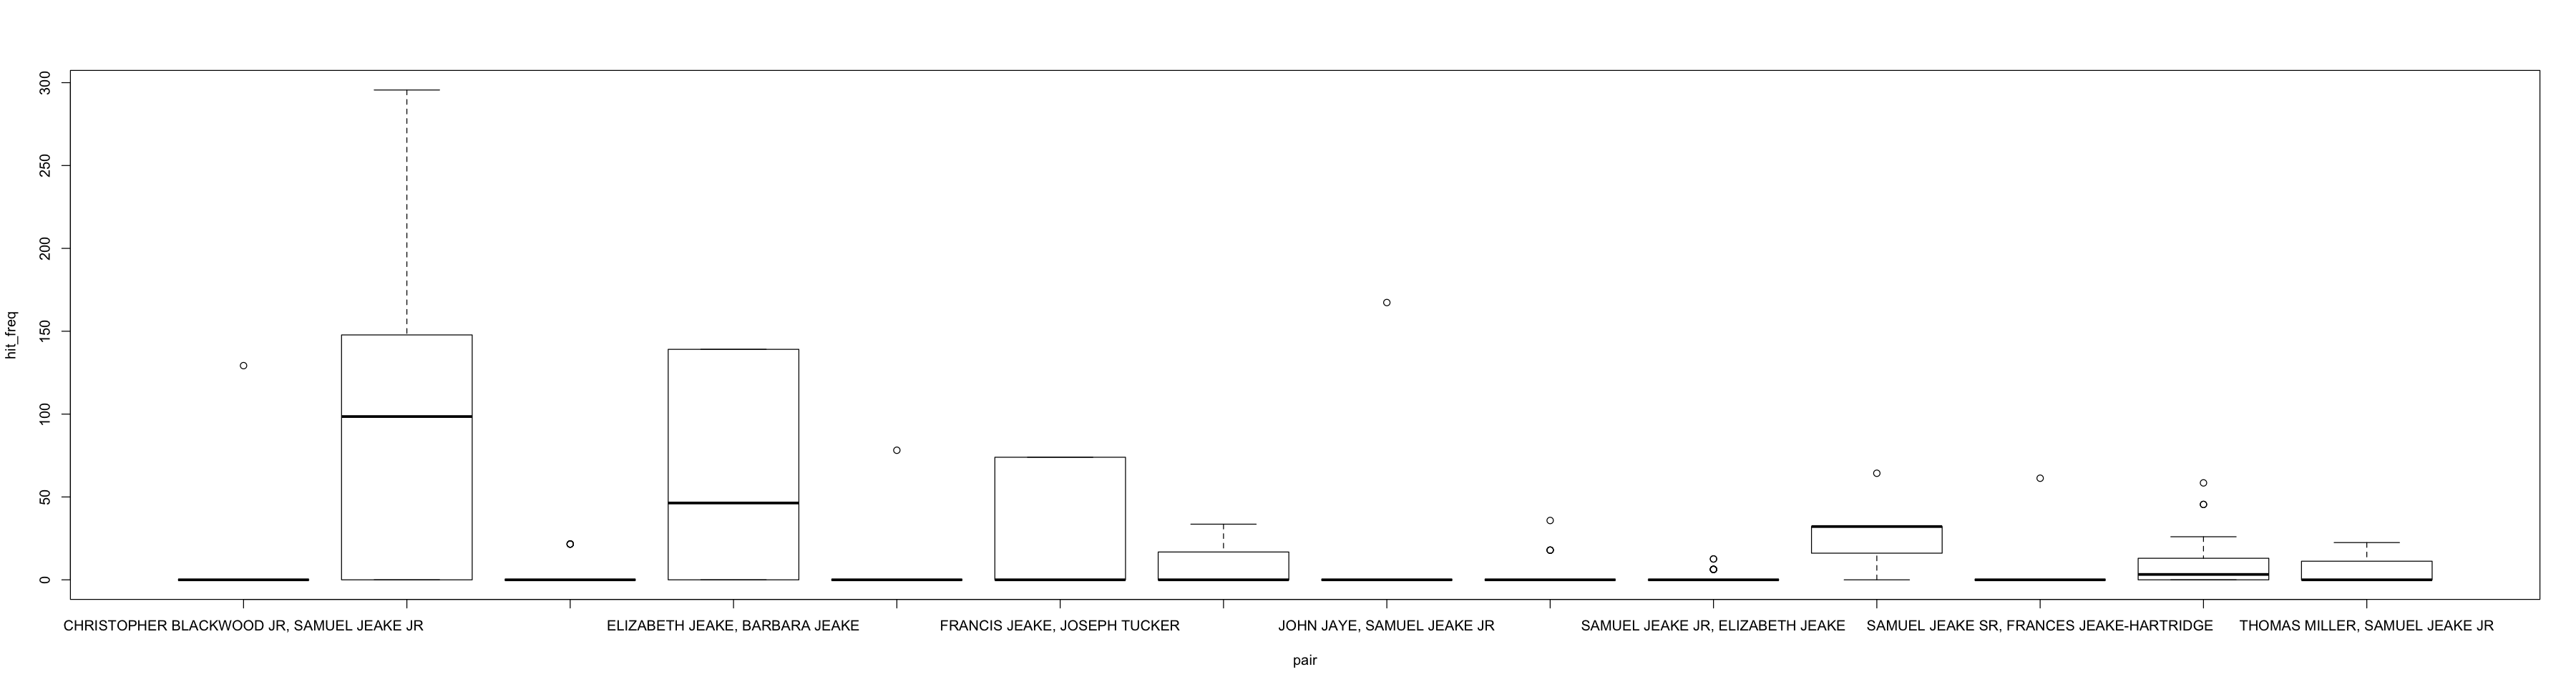

In [87]:
plot(effect(hit_freq ~ pair, data=jeake_pair))

par(cex.axis = 0.8)
par(las = 2)

options(repr.plot.width = 30, repr.plot.height = 8)

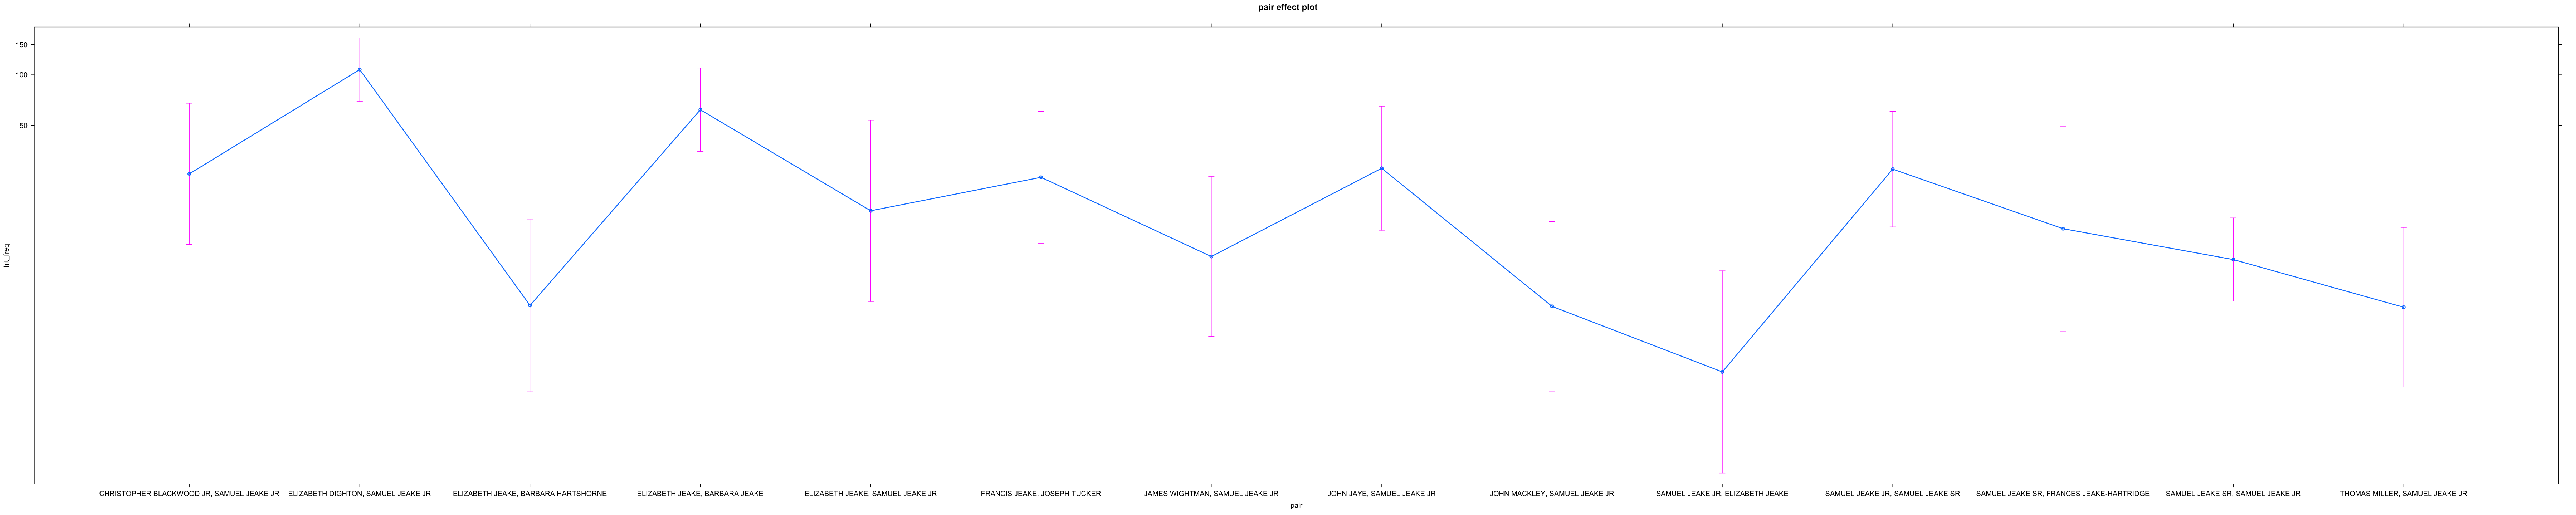

In [89]:
plot(eff)
 
par(cex.axis = 0.8)
par(las = 2)
# Increase the resolution of the plot (in inches)
options(repr.plot.width = 60, repr.plot.height = 12)

### 2 Generalised linear model using "pair" and "connection" as predictors

In [91]:
j_pair2 <- glm(hit_freq ~ pair + connection,
               data=jeake_pair,
               family=quasipoisson)

summary(j_pair2)
summary(j_pair2)$coef


Call:
glm(formula = hit_freq ~ pair + connection, family = quasipoisson, 
    data = jeake_pair)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-14.6104   -4.0133   -2.9024    0.8519   17.9089  

Coefficients: (2 not defined because of singularities)
                                             Estimate Std. Error t value
(Intercept)                                   3.25231    0.48650   6.685
pairELIZABETH DIGHTON, SAMUEL JEAKE JR        1.41801    0.53334   2.659
pairELIZABETH JEAKE, BARBARA HARTSHORNE      -1.78998    0.76882  -2.328
pairELIZABETH JEAKE, BARBARA JEAKE            0.87181    0.56495   1.543
pairELIZABETH JEAKE, SAMUEL JEAKE JR         -0.50261    0.79242  -0.634
pairFRANCIS JEAKE, JOSEPH TUCKER             -0.04740    0.66596  -0.071
pairJAMES WIGHTMAN, SAMUEL JEAKE JR          -1.12467    0.73509  -1.530
pairJOHN JAYE, SAMUEL JEAKE JR                0.07584    0.64770   0.117
pairJOHN MACKLEY, SAMUEL JEAKE JR            -1.80259    0.76059 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.25231060,0.4865034,6.68507221,2.470882e-10
"pairELIZABETH DIGHTON, SAMUEL JEAKE JR",1.41800730,0.5333441,2.65871023,8.509482e-03
"pairELIZABETH JEAKE, BARBARA HARTSHORNE",-1.78998155,0.7688195,-2.32822095,2.094723e-02
"pairELIZABETH JEAKE, BARBARA JEAKE",0.87180849,0.5649508,1.54315813,1.244476e-01
"pairELIZABETH JEAKE, SAMUEL JEAKE JR",-0.50260675,0.7924221,-0.63426648,5.266659e-01
"pairFRANCIS JEAKE, JOSEPH TUCKER",-0.04739848,0.6659561,-0.07117359,9.433341e-01
"pairJAMES WIGHTMAN, SAMUEL JEAKE JR",-1.12467431,0.7350882,-1.52998563,1.276748e-01
"pairJOHN JAYE, SAMUEL JEAKE JR",0.07583808,0.6477024,0.11708783,9.069135e-01
"pairJOHN MACKLEY, SAMUEL JEAKE JR",-1.80259441,0.7605862,-2.37000683,1.878428e-02
"pairSAMUEL JEAKE JR, ELIZABETH JEAKE",-2.69396546,0.8502260,-3.16852883,1.784330e-03


We are not getting information about the connections, probably due to, once again, the data sparsity. It would make more sense to build generalised linear mixed-effects models, using "pair" as a random effect.

### 2 Generalised linear mixed-effects model using "connection" as fixed effect and "pair" as random effect

In [125]:
j_pair2 <- glmer(hit_freq ~ connection + (1|pair),
               data=jeake_pair,
               family=negative.binomial(theta = 0.4))

summary(j_pair2)
summary(j_pair2)$coef

"------------------------------dispersion------------------------------"
dispersion_glmer(j_pair2)

"------------------------------drop1------------------------------"
drop1(j_pair2, test = "Chisq")

effect("connection", j_pair2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Negative Binomial(0.4)  ( log )
Formula: hit_freq ~ connection + (1 | pair)
   Data: jeake_pair

     AIC      BIC   logLik deviance df.resid 
  1041.8   1058.4   -515.9   1031.8      200 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.6306 -0.6176 -0.6044  0.2776  3.7668 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 0.9494   0.9744  
Number of obs: 205, groups:  pair, 14

Fixed effects:
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                  1.434      1.031   1.390    0.165
connectionEXTENDED FAMILY    1.379      1.168   1.181    0.238
connectionFAMILY             1.052      1.095   0.960    0.337

Correlation of Fixed Effects:
            (Intr) cEXTEF
cEXTENDEDFA -0.883       
cnnctFAMILY -0.941  0.832

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.433534,1.031305,1.390020,0.1645228
connectionEXTENDED FAMILY,1.378829,1.167667,1.180840,0.2376662
connectionFAMILY,1.051942,1.095447,0.960285,0.3369118


[1] "------------------------------dispersion------------------------------"

[1] 1.355955

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1041.819,NA,NA
connection,2,1039.147,1.328188,0.5147397



 connection effect
connection
BUSINESS; FRIEND  EXTENDED FAMILY           FAMILY 
        4.193494        16.649213        12.006833 

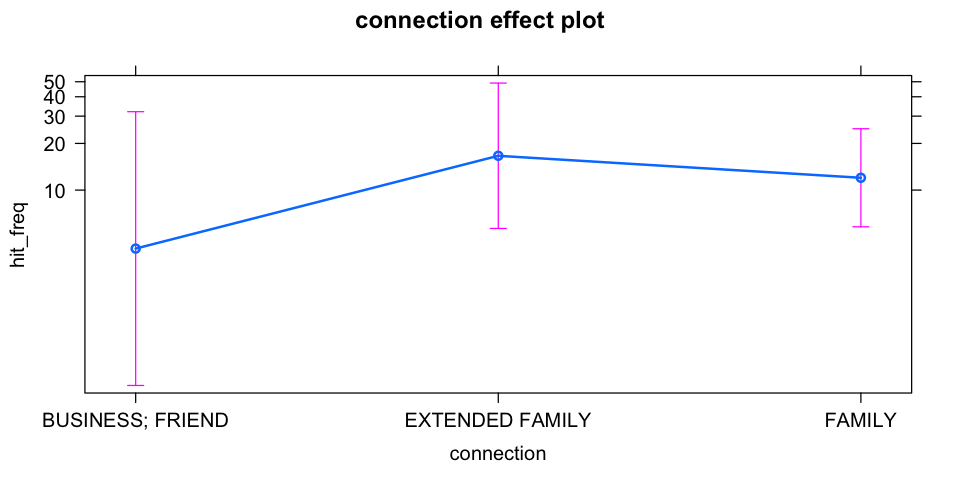

In [130]:
plot(effect("connection", j_pair2))

Given that exchanges among "BUSINESS;CORRESPONDENT" and "FRIEND" account for the least number of correspondences between set pairs (less than five), they are not included in the statistics.

That said, connection type does not seem to be significant predictor for the frequency of divine appeals called upon between the featured correspondent pairs.

### 3 Generalised linear mixed-effects model using "age_gap_over_20" as fixed effect and "pair" as random effect

In [131]:
j_pair3 <- glmer(hit_freq ~ age_gap_over_20 + (1|pair),
                 data=j_pair_gap,
                 family=negative.binomial(theta=0.4))

summary(j_pair3)
summary(j_pair3)$coef

"------------------------------dispersion------------------------------"
dispersion_glmer(j_pair3)

"------------------------------drop1------------------------------"
drop1(j_pair3, test = "Chisq")

effect("age_gap_over_20", j_pair3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Negative Binomial(0.4)  ( log )
Formula: hit_freq ~ age_gap_over_20 + (1 | pair)
   Data: j_pair_gap

     AIC      BIC   logLik deviance df.resid 
   864.1    876.5   -428.0    856.1      162 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.6306 -0.6181 -0.5767  0.2838  4.0132 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 0.9415   0.9703  
Number of obs: 166, groups:  pair, 11

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.9671     0.4927   3.992 6.54e-05 ***
age_gap_over_20TRUE   1.0799     0.6625   1.630    0.103    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
ag___20TRUE -0.739

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.967076,0.4927045,3.992406,6.540625e-05
age_gap_over_20TRUE,1.079881,0.6625092,1.629987,1.031042e-01


[1] "------------------------------dispersion------------------------------"

[1] 1.315166

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,864.0565,NA,NA
age_gap_over_20,1,864.4050,2.348515,0.1254024



 age_gap_over_20 effect
age_gap_over_20
    FALSE      TRUE 
 7.149742 21.051205 

Dropping the age_gap_over_20 variable would not significantly improve or worsen the model.

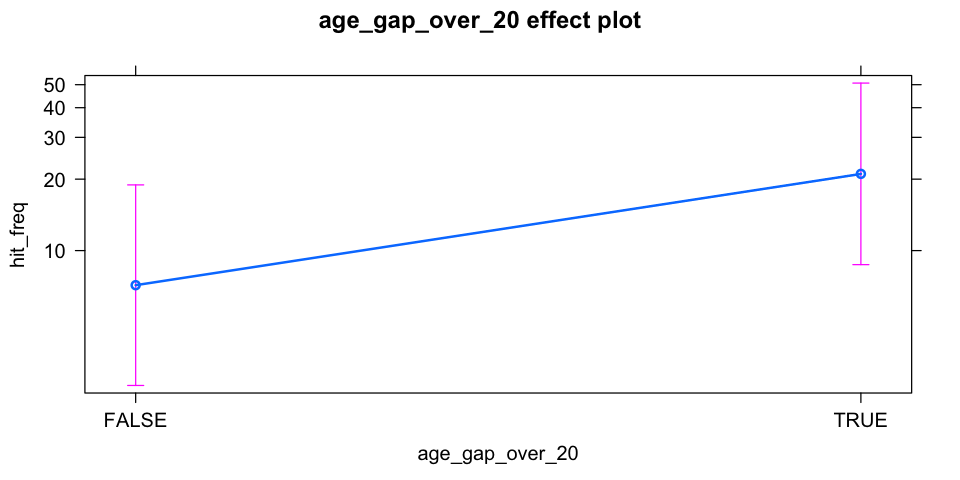

In [132]:
plot(effect("age_gap_over_20", j_pair3))

"age_gap_over_20" is not a signficant predictor.

### 4 Generalised linear mixed-effects model using "sender_is_older" as fixed effect and "pair" as random effect

In [137]:
j_pair4 <- glmer(hit_freq ~ sender_is_older + (1|pair),
                 data=j_pair_old,
                 family=negative.binomial(theta=0.4))

summary(j_pair4)
summary(j_pair4)$coef

"------------------------------dispersion------------------------------"
dispersion_glmer(j_pair4)

"------------------------------drop1------------------------------"
drop1(j_pair4, test = "Chisq")

effect("sender_is_older", j_pair4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Negative Binomial(0.4)  ( log )
Formula: hit_freq ~ sender_is_older + (1 | pair)
   Data: j_pair_old

     AIC      BIC   logLik deviance df.resid 
   869.3    881.7   -430.6    861.3      163 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.6306 -0.6177 -0.5776  0.3133  3.7593 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 1.238    1.113   
Number of obs: 167, groups:  pair, 12

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)           2.3327     0.6247   3.734 0.000188 ***
sender_is_olderTRUE   0.3062     0.7863   0.389 0.696958    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
sndr_s_TRUE -0.807

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.3327286,0.6247148,3.7340697,0.0001884103
sender_is_olderTRUE,0.3062045,0.7862898,0.3894296,0.6969584115


[1] "------------------------------dispersion------------------------------"

[1] 1.316813

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,869.2512,NA,NA
sender_is_older,1,867.4082,0.1570879,0.6918519



 sender_is_older effect
sender_is_older
   FALSE     TRUE 
10.30602 13.99826 

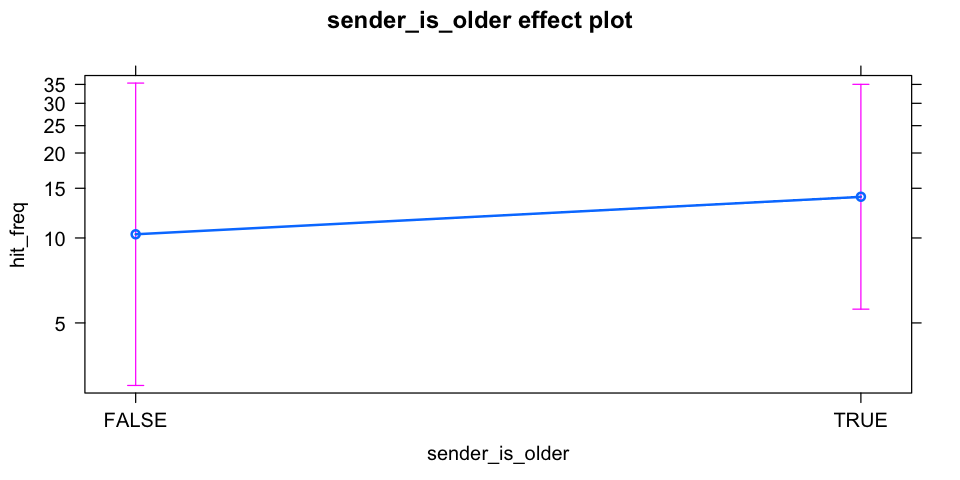

In [138]:
plot(effect("sender_is_older", j_pair4))

"sender_is_older" is not a significant predictor.

### 5 Generalised linear mixed-effects model using "sender_is_over_40" as fixed effect and "pair" as random effect

In [139]:
j_pair5 <- glmer(hit_freq ~ sender_over_40 + (1|pair),
                 data=j_pair_se40,
                 family=negative.binomial(theta=0.4))

summary(j_pair5)
summary(j_pair5)$coef

"------------------------------dispersion------------------------------"
dispersion_glmer(j_pair5)

"------------------------------drop1------------------------------"
drop1(j_pair5, test = "Chisq")

effect("sender_over_40", j_pair5)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Negative Binomial(0.4)  ( log )
Formula: hit_freq ~ sender_over_40 + (1 | pair)
   Data: j_pair_se40

     AIC      BIC   logLik deviance df.resid 
   906.3    918.9   -449.1    898.3      171 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.6306 -0.6176 -0.5778  0.3043  3.7747 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 1.152    1.073   
Number of obs: 175, groups:  pair, 12

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         2.50420    0.42880    5.84 5.22e-09 ***
sender_over_40TRUE  0.02341    0.58004    0.04    0.968    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
snd__40TRUE -0.595

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.50419940,0.4288048,5.83995176,5.221594e-09
sender_over_40TRUE,0.02341102,0.5800375,0.04036122,9.678051e-01


[1] "------------------------------dispersion------------------------------"

[1] 1.32406

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,906.2658,NA,NA
sender_over_40,1,904.2674,0.00163236,0.9677723



 sender_over_40 effect
sender_over_40
   FALSE     TRUE 
12.23376 12.52354 

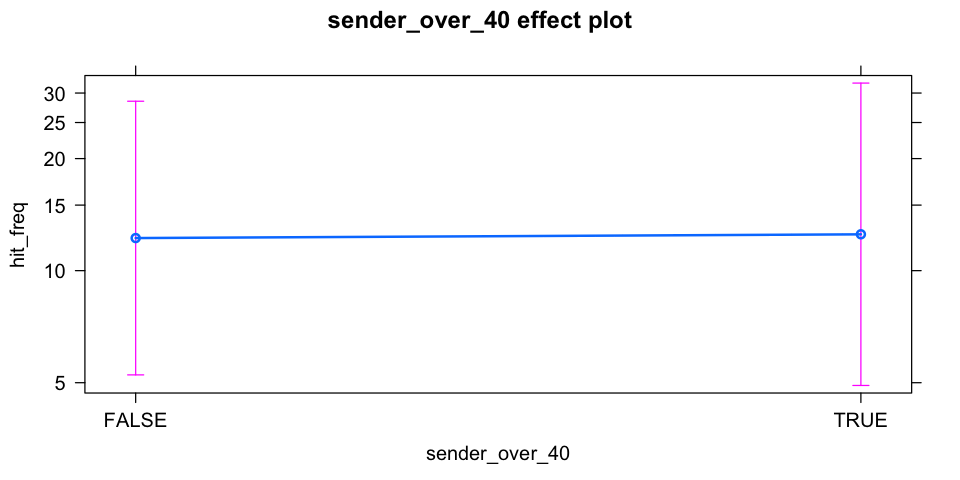

In [140]:
plot(effect("sender_over_40", j_pair5))

"sender_over_40" is not a significant predictor.

In [142]:
j_pair6 <- glmer(hit_freq ~ addressee_over_40 + (1|pair),
                 data=jeake_pair,
                 family=negative.binomial(theta=0.4))

summary(j_pair6)
summary(j_pair6)$coef

"------------------------------dispersion------------------------------"
dispersion_glmer(j_pair5)

"------------------------------drop1------------------------------"
drop1(j_pair6, test = "Chisq")

effect("addressee_over_40", j_pair6)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Negative Binomial(0.4)  ( log )
Formula: hit_freq ~ addressee_over_40 + (1 | pair)
   Data: jeake_pair

     AIC      BIC   logLik deviance df.resid 
  1041.1   1054.4   -516.6   1033.1      201 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.6305 -0.6176 -0.6070  0.2428  4.0773 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 1.061    1.03    
Number of obs: 205, groups:  pair, 14

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)             2.4773     0.3458   7.163 7.89e-13 ***
addressee_over_40TRUE   0.1136     0.7496   0.152     0.88    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
add__40TRUE -0.459

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.4772853,0.3458443,7.1630067,7.892650e-13
addressee_over_40TRUE,0.1136185,0.7496383,0.1515644,8.795305e-01


[1] "------------------------------dispersion------------------------------"

[1] 1.356132

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1041.124,NA,NA
addressee_over_40,1,1039.147,0.02295438,0.8795758



 addressee_over_40 effect
addressee_over_40
   FALSE     TRUE 
11.90889 13.34182 

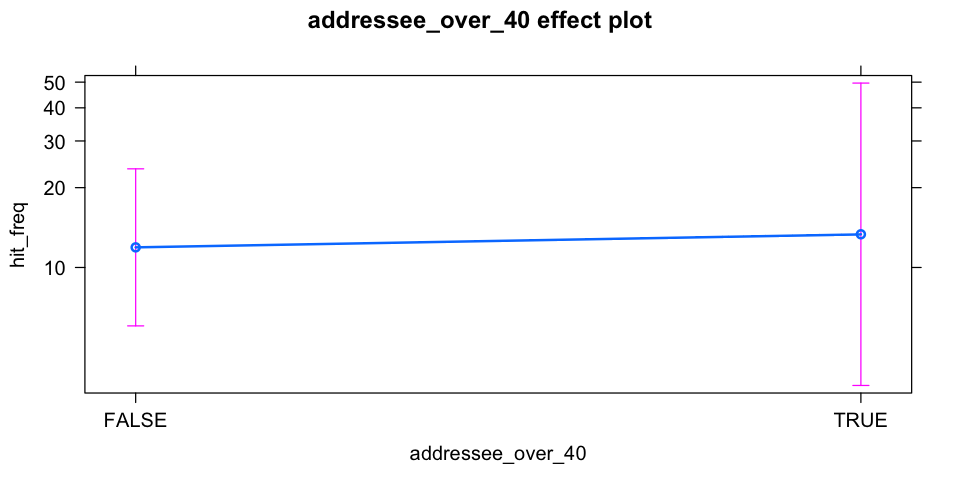

In [143]:
plot(effect("addressee_over_40", j_pair6))

"addressee_over_40" is not a significant predictor.

In [146]:
j_pair7 <- glmer(hit_freq ~ gender_pair + (1|pair),
                 data=jeake_pair,
                 family=negative.binomial(theta=0.4))

summary(j_pair7)
summary(j_pair7)$coef

"------------------------------dispersion------------------------------"
dispersion_glmer(j_pair7)

"------------------------------drop1------------------------------"
drop1(j_pair7, test = "Chisq")

effect("gender_pair", j_pair7)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Negative Binomial(0.4)  ( log )
Formula: hit_freq ~ gender_pair + (1 | pair)
   Data: jeake_pair

     AIC      BIC   logLik deviance df.resid 
  1040.0   1059.9   -514.0   1028.0      199 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.6309 -0.6177 -0.6084  0.3513  4.6131 

Random effects:
 Groups Name        Variance Std.Dev.
 pair   (Intercept) 0.6185   0.7865  
Number of obs: 205, groups:  pair, 14

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)              2.6558     0.6423   4.135 3.55e-05 ***
gender_pairFEMALE-MALE   1.1828     0.9962   1.187    0.235    
gender_pairMALE-FEMALE  -1.3118     0.9052  -1.449    0.147    
gender_pairMALE-MALE    -0.2343     0.7186  -0.326    0.744    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) g_FEMA g_MALE-F
g_FEM

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.6557554,0.6422756,4.134916,3.550849e-05
gender_pairFEMALE-MALE,1.1827788,0.9961688,1.187328,2.350984e-01
gender_pairMALE-FEMALE,-1.3118119,0.9052466,-1.449121,1.473038e-01
gender_pairMALE-MALE,-0.2343196,0.7186351,-0.326062,7.443774e-01


[1] "------------------------------dispersion------------------------------"

[1] 1.356983

[1] "------------------------------drop1------------------------------"

,Df,AIC,LRT,Pr(Chi)
<none>,NA,1040.002,NA,NA
gender_pair,3,1039.147,5.145035,0.1614799



 gender_pair effect
gender_pair
FEMALE-FEMALE   FEMALE-MALE   MALE-FEMALE     MALE-MALE 
    14.235736     46.457328      3.834134     11.262018 

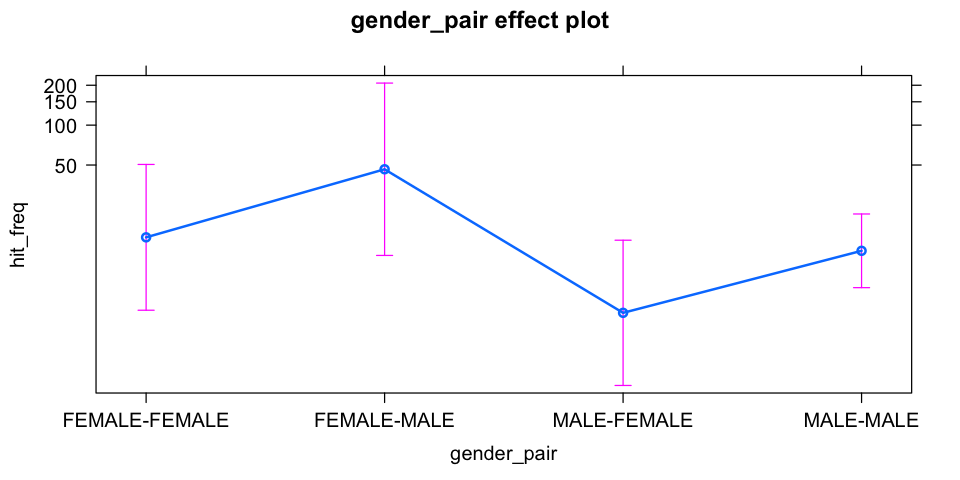

In [147]:
plot(effect("gender_pair", j_pair7))

"gender_pair" is not a significant predictor.

## Appendix: failed experiments
### 3.1 Generalised linear model using "pair" and "age_gap_over_20" as predictors

In [100]:
j_pair3 <- glm(hit_freq ~ pair + age_gap_over_20,
               data=j_pair_gap,
               family=quasipoisson)

summary(j_pair3)
summary(j_pair3)$coef


Call:
glm(formula = hit_freq ~ pair + age_gap_over_20, family = quasipoisson, 
    data = j_pair_gap)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-14.610   -4.013   -1.870    1.412   14.982  

Coefficients: (1 not defined because of singularities)
                                             Estimate Std. Error t value
(Intercept)                                    3.2523     0.4615   7.048
pairELIZABETH DIGHTON, SAMUEL JEAKE JR         1.4180     0.5059   2.803
pairELIZABETH JEAKE, BARBARA HARTSHORNE       -1.7900     0.7293  -2.454
pairELIZABETH JEAKE, BARBARA JEAKE             0.8718     0.5359   1.627
pairELIZABETH JEAKE, SAMUEL JEAKE JR          -0.5026     0.7517  -0.669
pairFRANCIS JEAKE, JOSEPH TUCKER              -0.0474     0.6317  -0.075
pairSAMUEL JEAKE JR, ELIZABETH JEAKE          -2.6940     0.8066  -3.340
pairSAMUEL JEAKE JR, SAMUEL JEAKE SR           0.0640     0.5964   0.107
pairSAMUEL JEAKE SR, FRANCES JEAKE-HARTRIDGE  -0.7458     0.8136  -0.9

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.25231067,0.4614709,7.04770486,5.614243e-11
"pairELIZABETH DIGHTON, SAMUEL JEAKE JR",1.41800723,0.5059172,2.80284472,5.712724e-03
"pairELIZABETH JEAKE, BARBARA HARTSHORNE",-1.78998160,0.7292991,-2.45438602,1.521911e-02
"pairELIZABETH JEAKE, BARBARA JEAKE",0.87180842,0.5359076,1.62678872,1.058132e-01
"pairELIZABETH JEAKE, SAMUEL JEAKE JR",-0.50260676,0.7516566,-0.66866537,5.047036e-01
"pairFRANCIS JEAKE, JOSEPH TUCKER",-0.04739855,0.6317441,-0.07502809,9.402891e-01
"pairSAMUEL JEAKE JR, ELIZABETH JEAKE",-2.69396553,0.8065652,-3.34004675,1.049445e-03
"pairSAMUEL JEAKE JR, SAMUEL JEAKE SR",0.06400294,0.5963965,0.10731608,9.146770e-01
"pairSAMUEL JEAKE SR, FRANCES JEAKE-HARTRIDGE",-0.74580557,0.8135842,-0.91669133,3.607285e-01
"pairSAMUEL JEAKE SR, SAMUEL JEAKE JR",-1.16623358,0.5359879,-2.17585798,3.108047e-02


Again, we are not getting information about age gap over 20.

### 3.2 Generalised linear model using "age_gap_over_20" and "pair" as predictors (predictor sequence flipped)

In [103]:
j_pair4 <- glm(hit_freq ~ age_gap_over_20 + pair,
               data=j_pair_gap,
               family=quasipoisson)

summary(j_pair4)
summary(j_pair4)$coef


Call:
glm(formula = hit_freq ~ age_gap_over_20 + pair, family = quasipoisson, 
    data = j_pair_gap)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-14.610   -4.013   -1.870    1.412   14.982  

Coefficients: (1 not defined because of singularities)
                                             Estimate Std. Error t value
(Intercept)                                    3.2523     0.4615   7.048
age_gap_over_20TRUE                           -1.1662     0.5360  -2.176
pairELIZABETH DIGHTON, SAMUEL JEAKE JR         2.5842     0.3425   7.545
pairELIZABETH JEAKE, BARBARA HARTSHORNE       -0.6237     0.6271  -0.995
pairELIZABETH JEAKE, BARBARA JEAKE             2.0380     0.3854   5.287
pairELIZABETH JEAKE, SAMUEL JEAKE JR          -0.5026     0.7517  -0.669
pairFRANCIS JEAKE, JOSEPH TUCKER               1.1188     0.5104   2.192
pairSAMUEL JEAKE JR, ELIZABETH JEAKE          -2.6940     0.8066  -3.340
pairSAMUEL JEAKE JR, SAMUEL JEAKE SR           1.2302     0.4659   2.6

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.2523107,0.4614709,7.0477049,5.614243e-11
age_gap_over_20TRUE,-1.1662336,0.5359879,-2.1758580,3.108047e-02
"pairELIZABETH DIGHTON, SAMUEL JEAKE JR",2.5842408,0.3425266,7.5446437,3.600865e-12
"pairELIZABETH JEAKE, BARBARA HARTSHORNE",-0.6237480,0.6270961,-0.9946610,3.214514e-01
"pairELIZABETH JEAKE, BARBARA JEAKE",2.0380420,0.3854468,5.2874797,4.153260e-07
"pairELIZABETH JEAKE, SAMUEL JEAKE JR",-0.5026068,0.7516566,-0.6686654,5.047036e-01
"pairFRANCIS JEAKE, JOSEPH TUCKER",1.1188350,0.5103654,2.1922235,2.985466e-02
"pairSAMUEL JEAKE JR, ELIZABETH JEAKE",-2.6939655,0.8065652,-3.3400468,1.049445e-03
"pairSAMUEL JEAKE JR, SAMUEL JEAKE SR",1.2302365,0.4658982,2.6405696,9.123740e-03
"pairSAMUEL JEAKE SR, FRANCES JEAKE-HARTRIDGE",-0.7458056,0.8135842,-0.9166913,3.607285e-01


Based on flipping the predictors around, we notice that the "SAMUEL JEAKE SR, SAMUEL JEAKE JR" pair has perfect correlation, causing singularity. It might be worthwhile to drop this variable from the dataset. 

### 3.3 Generalised linear model using "age_gap_over_20" and "pair" as predictors, variable leading to singularity removed

In [117]:
# remove "SAMUEL JEAKE SR, SAMUEL JEAKE JR" value from pair column
j_pair_gap2 <- j_pair_gap[!(j_pair_gap$pair %in% "SAMUEL JEAKE SR, SAMUEL JEAKE JR"),  ]
j_pair_gap2$age_gap_over_20 <- droplevels(j_pair_gap2$age_gap_over_20)

"age_gap_over_20:"
levels(j_pair_gap2$age_gap_over_20)
nrow(j_pair_gap2)

[1] "age_gap_over_20:"

[1] "FALSE" "TRUE"

[1] 120

In [119]:
j_pair5 <- glm(hit_freq ~ age_gap_over_20 + pair,
               data=j_pair_gap2,
               family=quasipoisson)

summary(j_pair5)
summary(j_pair5)$coef


Call:
glm(formula = hit_freq ~ age_gap_over_20 + pair, family = quasipoisson, 
    data = j_pair_gap2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-14.610   -2.938   -1.870    1.302   14.982  

Coefficients: (1 not defined because of singularities)
                                             Estimate Std. Error t value
(Intercept)                                    3.2523     0.4818   6.750
age_gap_over_20TRUE                            0.0640     0.6226   0.103
pairELIZABETH DIGHTON, SAMUEL JEAKE JR         1.3540     0.4499   3.010
pairELIZABETH JEAKE, BARBARA HARTSHORNE       -1.8540     0.7093  -2.614
pairELIZABETH JEAKE, BARBARA JEAKE             0.8078     0.4863   1.661
pairELIZABETH JEAKE, SAMUEL JEAKE JR          -0.5026     0.7848  -0.640
pairFRANCIS JEAKE, JOSEPH TUCKER              -0.1114     0.5987  -0.186
pairSAMUEL JEAKE JR, ELIZABETH JEAKE          -2.6940     0.8420  -3.199
pairSAMUEL JEAKE JR, SAMUEL JEAKE SR               NA         NA     

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.25231060,0.4818168,6.7500982,7.237908e-10
age_gap_over_20TRUE,0.06400301,0.6226448,0.1027922,9.183151e-01
"pairELIZABETH DIGHTON, SAMUEL JEAKE JR",1.35400429,0.4498816,3.0096901,3.243185e-03
"pairELIZABETH JEAKE, BARBARA HARTSHORNE",-1.85398456,0.7093248,-2.6137314,1.020969e-02
"pairELIZABETH JEAKE, BARBARA JEAKE",0.80780548,0.4862525,1.6612882,9.950320e-02
"pairELIZABETH JEAKE, SAMUEL JEAKE JR",-0.50260675,0.7847884,-0.6404360,5.232210e-01
"pairFRANCIS JEAKE, JOSEPH TUCKER",-0.11140149,0.5986532,-0.1860869,8.527194e-01
"pairSAMUEL JEAKE JR, ELIZABETH JEAKE",-2.69396546,0.8420354,-3.1993492,1.799906e-03
"pairSAMUEL JEAKE SR, FRANCES JEAKE-HARTRIDGE",-0.74580555,0.8494389,-0.8779979,3.818586e-01
"pairTHOMAS MILLER, SAMUEL JEAKE JR",-1.81435322,0.7272982,-2.4946483,1.409447e-02


Removing the variable just creates a new singularity (this time "SAMUEL JEAKE JR, SAMUEL JEAKE SR").